In [1]:
# default package
import sys
import os
from collections import defaultdict

# third party package
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
from pytorch_lightning.callbacks import ModelCheckpoint
import torch.nn as nn
from torch.utils.data import DataLoader

# my package
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))
from src.torch_network import CNN
import src.torch_dataset as torch_dataset

In [2]:
# global parameter
CKPT_PATH="../lightning_logs/version_7/checkpoints/epoch=1-step=1097.ckpt"
TEST_NORMAL_PATH="../_data/x_test_normal.npy"
batch_size=3

In [3]:
def load_model(model:nn.Module=None)->nn.Module:
    checkpoint = torch.load(CKPT_PATH)
    state_dict={}
    for key,value in checkpoint['state_dict'].items():
        modelkey=key.replace("model.","")
        state_dict[modelkey]=value
    model.load_state_dict(state_dict)
    return model

In [4]:
def generate_dataloader():
    dataset=torch_dataset.Dataset(TEST_NORMAL_PATH,
                              torch_dataset.BaseTransform())
    loader=DataLoader(dataset,batch_size=batch_size)
    return loader

In [5]:
def generate_outputs(model:nn.Module,loader):
    model.eval()
    criterion=torch.nn.MSELoss()
    loss=defaultdict(list)
    for inputs, _ in loader:
        with torch.no_grad():
            outputs = model(inputs)
        break
    return inputs,outputs

In [6]:
model=load_model(CNN())
loader=generate_dataloader()
inputs,outputs=generate_outputs(model,loader)

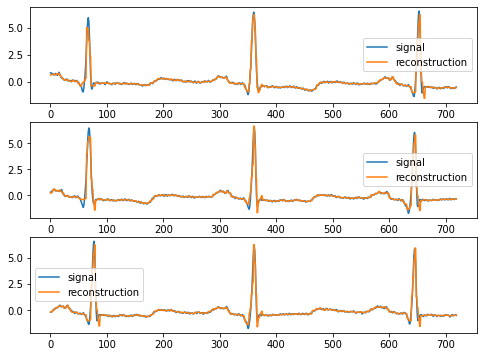

In [7]:
fig,axes=plt.subplots(batch_size,figsize=(8,6))
for idx,(output,input) in enumerate(zip(outputs,inputs)):
    axes[idx].plot(input.detach().numpy().reshape(720),label="signal")
    axes[idx].plot(output.detach().numpy().reshape(720),label="reconstruction")
    axes[idx].legend()